Support Vector Machine (SVM) Model:
SVM Accuracy: 0.9824561403508771
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

SVM Confusion Matrix:
 [[71  0]
 [ 2 41]]

k-Nearest Neighbors (k-NN) Model:
k-NN Accuracy: 0.9473684210526315
k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

k-NN Confusion Matrix:
 [[68  3]
 [ 3 40]]


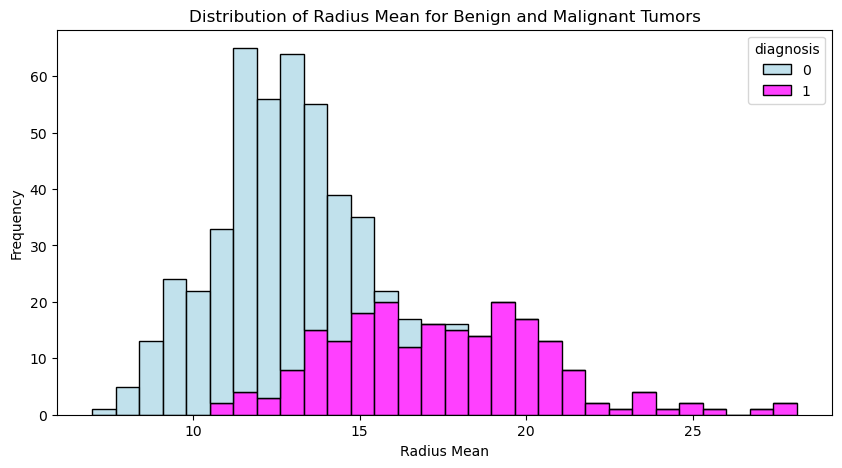

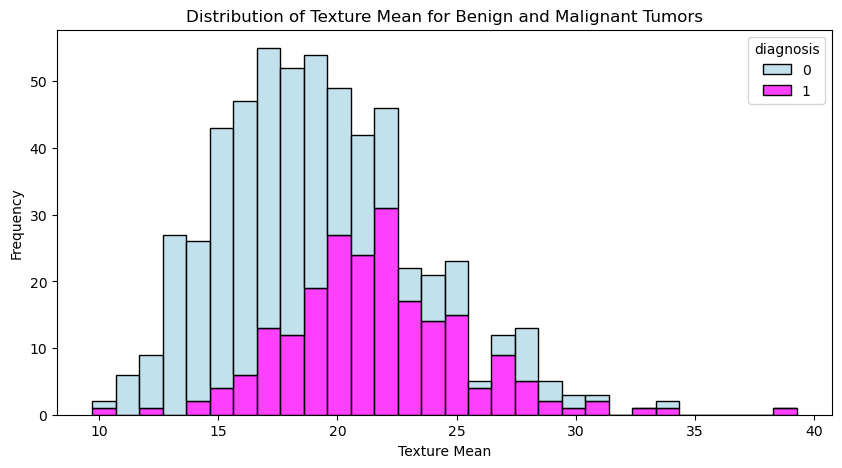

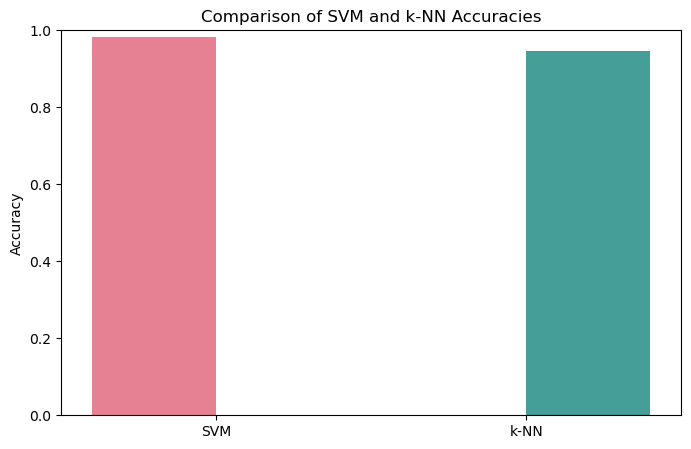


SVM Prediction for Sample 10: Benign(NON CANCEROUS)
k-NN Prediction for Sample 10: Benign(NON CANCEROUS)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load the dataset
df = pd.read_csv("C:/Users/nshar/Downloads/data.csv")

# Drop unnecessary columns
df = df.drop(['Unnamed: 32', 'id'], axis=1, errors='ignore')

# Label Encoding for diagnosis column
LEncoder = LabelEncoder()
df['diagnosis'] = LEncoder.fit_transform(df['diagnosis'])

# Split dataset into features (X) and target (y)
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis'].values

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# 1. Support Vector Machine (SVM)
print("Support Vector Machine (SVM) Model:")
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Evaluate SVM model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svc))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

# 2. k-Nearest Neighbors (k-NN)
print("\nk-Nearest Neighbors (k-NN) Model:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate k-NN model
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("k-NN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("k-NN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Visualize distribution of radius_mean for malignant vs benign tumors
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='radius_mean', hue='diagnosis', multiple="stack", palette={0: "lightblue", 1: "magenta"}, bins=30)
plt.xlabel("Radius Mean")
plt.ylabel("Frequency")
plt.title("Distribution of Radius Mean for Benign and Malignant Tumors")
plt.show()

# Visualize distribution of texture_mean for malignant vs benign tumors
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='texture_mean', hue='diagnosis', multiple="stack", palette={0: "lightblue", 1: "magenta"}, bins=30)
plt.xlabel("Texture Mean")
plt.ylabel("Frequency")
plt.title("Distribution of Texture Mean for Benign and Malignant Tumors")
plt.show()

# Compare accuracies of SVM and k-NN in a bar plot
accuracies = [accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_knn)]
model_names = ['SVM', 'k-NN']

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='husl', hue=model_names)
plt.ylabel("Accuracy")
plt.title("Comparison of SVM and k-NN Accuracies")
plt.ylim(0, 1)  # Set y-axis limits for clarity
plt.legend([], [], frameon=False)  # Remove legend
plt.show()

# **New Section: Predict and Display Final Output (Breast Cancer or Not)**

# Predicting for a new example (sample from the test set)
sample_idx = 10  # Example: pick an index from the test set
sample_data = X_test[sample_idx].reshape(1, -1)  # Reshape for single sample prediction

# Predict with SVM model
prediction_svc = svc.predict(sample_data)[0]
prediction_label_svc = "Malignant(CANCEROUS)" if prediction_svc == 1 else "Benign(NON CANCEROUS)"
print(f"\nSVM Prediction for Sample {sample_idx}: {prediction_label_svc}")

# Predict with k-NN model
prediction_knn = knn.predict(sample_data)[0]
prediction_label_knn = "Malignant(CANCEROUS)" if prediction_knn == 1 else "Benign(NON CANCEROUS)"
print(f"k-NN Prediction for Sample {sample_idx}: {prediction_label_knn}")
